In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('breast-cancer.csv')
df = df.set_index(['id'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [3]:
des = df.describe()
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concavepoints_mean         0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concavepoints_se           0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concavepoints_worst        0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
des.to_excel('des.xlsx')

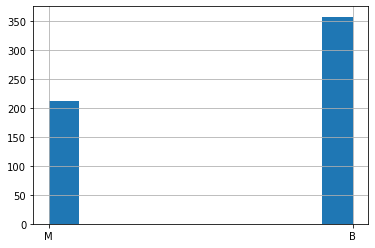

In [5]:
y=df['diagnosis']
y.hist()
plt.show()

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

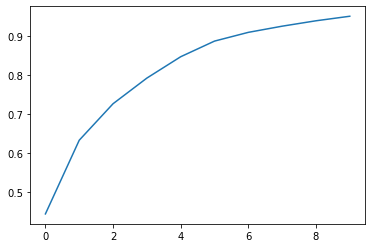

In [6]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop(['diagnosis'],axis=1)
X_std = StandardScaler().fit_transform(X)
pca = PCA(0.95)
x_pca = pca.fit_transform(X_std)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
pca.explained_variance_ratio_

In [7]:
X_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

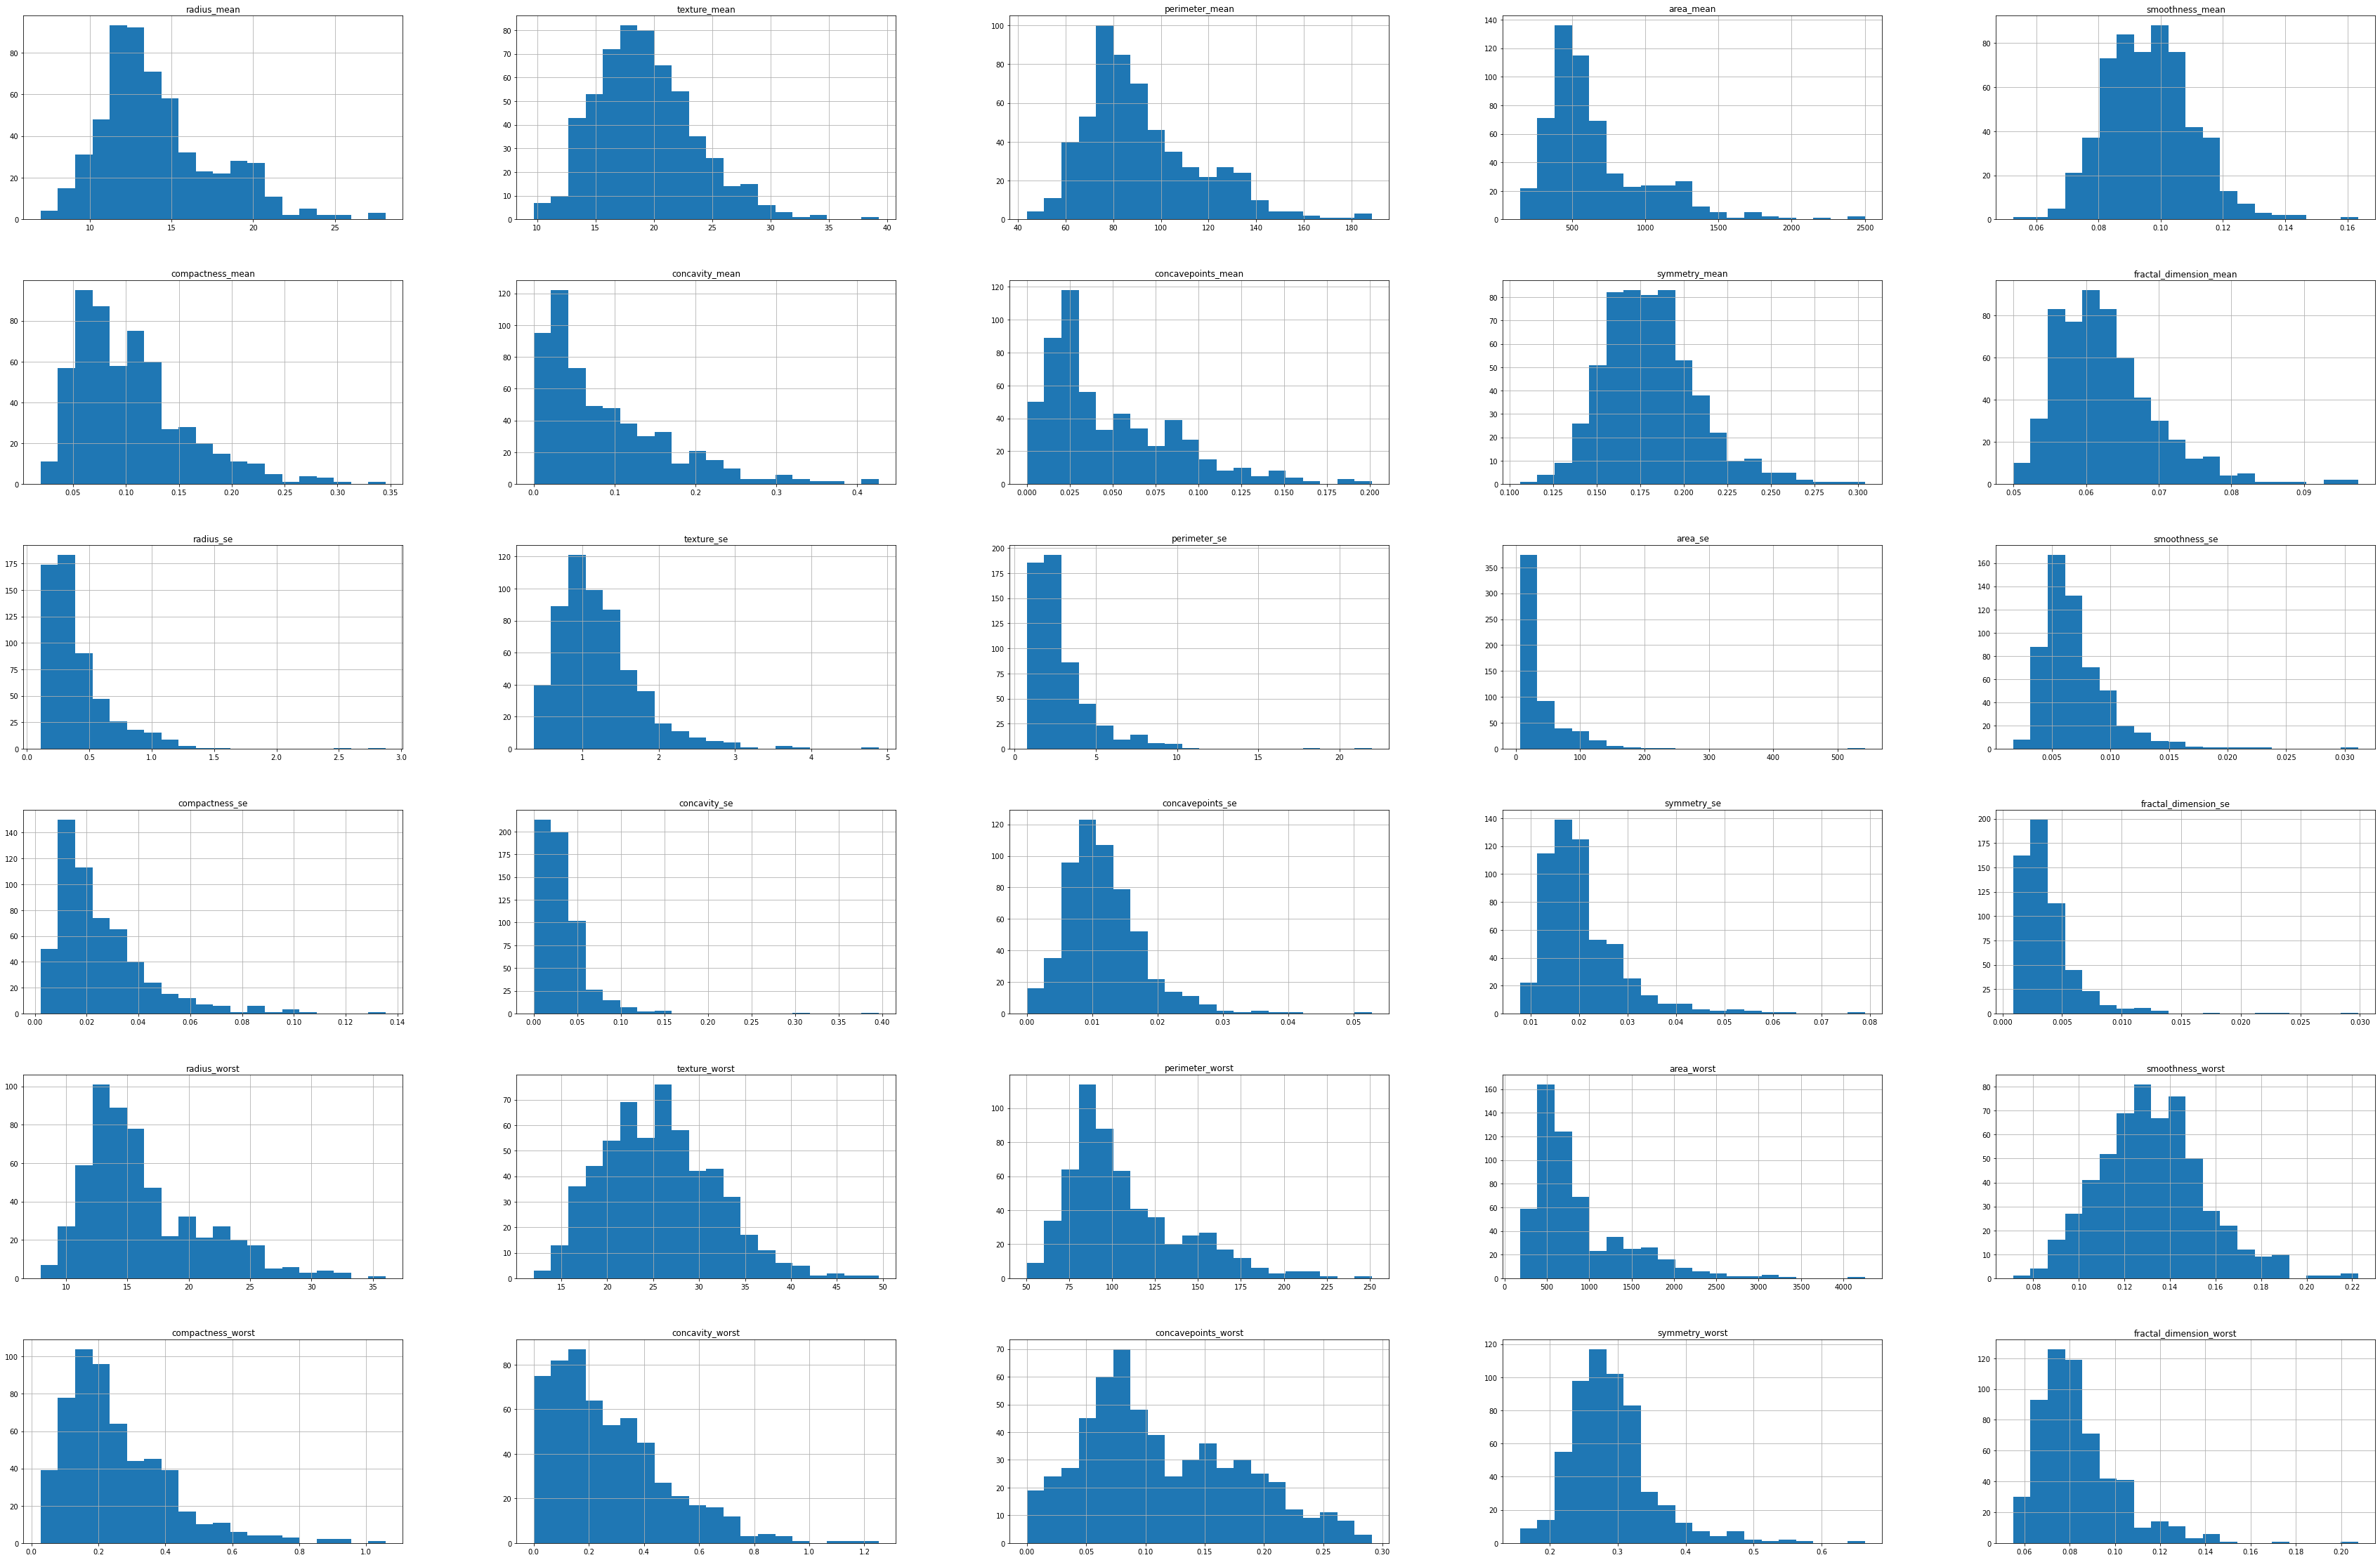

In [8]:
X.hist(figsize = (60,40), bins=20)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
y = [0 if i=='B' else 1 for i in y]
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(x_pca),y,test_size=0.4,random_state=42)

In [106]:
X_train.drop[X_train.iloc[:,-1]]

TypeError: 'method' object is not subscriptable

In [10]:
# Training model with default parameters
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
name = "LogisticRegression"
Logregresion = LogisticRegression()
cross_val_scores = cross_val_score(Logregresion, X_train, y_train, cv=5,scoring='recall')
y_train_pred = cross_val_predict(Logregresion, X_train, y_train, cv=5)
print("Model: {m:s} avg cross validation score={s:3.3f}\n".format(m=name, s=cross_val_scores.mean()) )

Model: LogisticRegression avg cross validation score=0.946



In [11]:
# Fine tunning
from sklearn.model_selection import GridSearchCV
param_grid = {"max_iter": [80, 100, 120],
              "fit_intercept": [True, False],
              "multi_class": ['ovr', 'multinomial', 'auto']}
grid_search = GridSearchCV(
    Logregresion, param_grid, cv=5, scoring="recall", return_train_score=True
)
grid_search = grid_search.fit(X_train, y_train)
results = pd.DataFrame(grid_search.cv_results_)
print("The best recall is",grid_search.best_score_)
print("Best parameters:", '\n', grid_search.best_params_)
results.iloc[:,4:15]

The best recall is 0.954131054131054
Best parameters: 
 {'fit_intercept': False, 'max_iter': 80, 'multi_class': 'ovr'}


,param_fit_intercept,param_max_iter,param_multi_class,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,True,80,ovr,"{'fit_intercept': True, 'max_iter': 80, 'multi...",0.962963,0.884615,1.0,0.884615,1.0,0.946439,0.052259
1,True,80,multinomial,"{'fit_intercept': True, 'max_iter': 80, 'multi...",0.962963,0.884615,1.0,0.884615,1.0,0.946439,0.052259
2,True,80,auto,"{'fit_intercept': True, 'max_iter': 80, 'multi...",0.962963,0.884615,1.0,0.884615,1.0,0.946439,0.052259
3,True,100,ovr,"{'fit_intercept': True, 'max_iter': 100, 'mult...",0.962963,0.884615,1.0,0.884615,1.0,0.946439,0.052259
4,True,100,multinomial,"{'fit_intercept': True, 'max_iter': 100, 'mult...",0.962963,0.884615,1.0,0.884615,1.0,0.946439,0.052259
5,True,100,auto,"{'fit_intercept': True, 'max_iter': 100, 'mult...",0.962963,0.884615,1.0,0.884615,1.0,0.946439,0.052259
6,True,120,ovr,"{'fit_intercept': True, 'max_iter': 120, 'mult...",0.962963,0.884615,1.0,0.884615,1.0,0.946439,0.052259
7,True,120,multinomial,"{'fit_intercept': True, 'max_iter': 120, 'mult...",0.962963,0.884615,1.0,0.884615,1.0,0.946439,0.052259
8,True,120,auto,"{'fit_intercept': True, 'max_iter': 120, 'mult...",0.962963,0.884615,1.0,0.884615,1.0,0.946439,0.052259
9,False,80,ovr,"{'fit_intercept': False, 'max_iter': 80, 'mult...",0.962963,0.923077,1.0,0.884615,1.0,0.954131,0.044906


In [12]:
# Test model
from sklearn.metrics import roc_auc_score, RocCurveDisplay
model1 = LogisticRegression(fit_intercept= False, max_iter= 80, multi_class= 'ovr')
cross_val_scores = cross_val_score(model1, X_train, y_train, cv=5)
print("Model: {m:s} avg cross validation score={s:3.3f}\n".format(m=name, s=cross_val_scores.mean()))
model1.fit(X_train, y_train)
y_test_pred = model1.predict(X_test)

Model: LogisticRegression avg cross validation score=0.971



[[146   2]
 [  1  79]]


Text(30.5, 0.5, 'true')

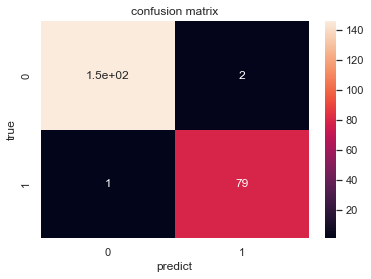

In [14]:
# Prediction evaluation
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(y_test, y_test_pred)
print(C2)
sns.heatmap(C2,annot=True,ax=ax) 

ax.set_title('confusion matrix')
ax.set_xlabel('predict') 
ax.set_ylabel('true')

recall of the test set of data: 0.9875
AUC of the test set of data: 0.9983108108108107


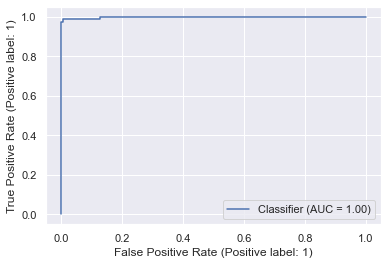

In [13]:
recall = recall_score(y_test, y_test_pred)
print('recall of the test set of data:', recall)
y_pred_proba = model1.predict_proba(X_test)
y_pre_p = y_pred_proba[:, 1]
print('AUC of the test set of data:', roc_auc_score(y_test,y_pre_p))
RocCurveDisplay.from_predictions(y_test, y_pre_p)

In [37]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [15]:
x = np.array([[1,2],[2,3],[4,5]])
print(np.std(x),np.mean())

1.3437096247164249 2.8333333333333335


In [53]:
de = StandardScaler().fit(x)
y= np.array([[3,4]])
z =de.transform(y)
print(z,(y-np.mean(x))/np.std(x))

[[0.53452248 0.53452248]] [[0.12403473 0.86824314]]


In [19]:
de = StandardScaler().fit_transform(x)

In [20]:
de.mean_

array([[-1.06904497, -1.06904497],
       [-0.26726124, -0.26726124],
       [ 1.33630621,  1.33630621]])

In [29]:
de.mean_

array([2.33333333, 3.33333333])

In [35]:
(3-2.33333)/np.std([1,2,4])

0.5345251564372678

In [55]:
m = pd.DataFrame(np.array([1,2]).reshape(1,2))

In [56]:
de.transform(m)

array([[-1.06904497, -1.06904497]])

In [79]:
float('3.2')

3.2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-4.769710,-0.542962,0.893868,1.731061,1.001713,0.963768,0.236677,-0.701538,-0.668046,-0.841693,-0.503225,0.677594,-0.097984,-0.144619,0.277361,-0.062371,-0.339547
1,-2.894311,-0.977944,-0.805644,-1.720779,-0.028984,0.211904,0.672514,0.478699,0.094628,-0.014972,0.118161,0.317484,-0.253838,0.016638,-0.139463,0.277746,0.276132
2,-1.176026,1.011370,-0.711768,1.066068,-1.421901,-0.265440,0.194445,-0.462718,0.358017,0.794776,0.102876,0.073868,0.062299,0.461368,-0.131161,-0.265664,0.055756
3,-1.131577,-1.411002,-0.565053,1.994961,0.528488,0.072558,-0.175969,-0.255302,0.311695,-0.214098,0.135321,-0.054443,0.418411,0.527781,0.165757,0.033759,-0.115245
4,-3.536415,-1.246854,3.385411,-4.666051,-1.875728,0.890398,0.925510,-1.086779,-1.207719,-0.484396,0.925361,-0.165226,0.331755,-0.109944,0.148129,-0.312133,-0.166490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,-0.307856,7.387812,3.819086,2.133556,2.710703,-1.639758,2.428361,1.318268,-1.885126,3.192639,0.057840,0.511031,-0.335513,0.480352,0.247191,1.491153,-0.394740
337,-0.749271,1.797639,-0.568366,-0.560499,-0.933096,-1.610187,-0.498350,-0.453243,0.527566,-0.459627,0.154943,-0.186821,-0.634201,0.404287,0.108685,0.026052,0.041735
338,-4.506563,-3.169273,-0.188062,0.391160,1.385207,1.138779,0.149404,0.142013,-0.429720,0.348543,0.298456,0.058027,0.356557,-0.353202,-0.082351,0.015939,0.142773
339,0.664441,0.436861,-2.680782,-0.729227,-0.027787,-1.082051,-0.001051,-0.127618,-0.009942,-0.481072,0.094721,0.239485,-0.385853,-0.312113,0.189271,0.177538,0.095893


In [94]:
index=df.index
df['id']=index
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst,id
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,842302
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,842517
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,84300903
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,84348301
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,84358402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,926424
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,926682
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,926954


In [129]:
x=df[(df['radius_mean']>=13) & (df['radius_mean']<=15)]
x

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
84667401,M,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,...,15.03,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.22080,0.3596,0.14310
84799002,M,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,...,17.46,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.17120,0.4218,0.13410
848406,M,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.2914,0.16090,0.3029,0.08216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922296,B,13.21,28.06,84.88,538.4,0.08671,0.06877,0.02987,0.03275,0.1628,...,14.37,37.17,92.48,629.6,0.1072,0.1381,0.1062,0.07958,0.2473,0.06443
922297,B,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,...,15.05,24.75,99.17,688.6,0.1264,0.2037,0.1377,0.06845,0.2249,0.08492
922576,B,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,...,15.35,29.09,97.58,729.8,0.1216,0.1517,0.1049,0.07174,0.2642,0.06953
